In [1]:
from ast import literal_eval
import pandas as pd
import numpy as np
df = pd.read_csv('/Users/kexinhuang/Downloads/TDC Leaderboard Submission Form.csv')

In [2]:
df = df.rename(columns = {
    df.columns.values[0]: 'Time',
    df.columns.values[1]: 'Name',
    df.columns.values[2]: 'Email',
    df.columns.values[3]: 'Model',
    df.columns.values[4]: 'Paper_URL',
    df.columns.values[5]: 'Code_URL',
    df.columns.values[6]: 'Hardware',
    df.columns.values[7]: '#Params',
    df.columns.values[8]: 'Group',
    df.columns.values[9]: 'Text_Result',
    df.columns.values[10]: 'PKL_Result',    
})
df = df.drop(df.columns.values[11], axis = 1)

In [3]:
def return_text(x):
    try:
        y = literal_eval(x)
    except:
        y = x
    return y
df['Result'] = df.Text_Result.apply(lambda x: return_text(x))

In [4]:
metrics_direction = {
    'mae': 'desc',
    'roc-auc': 'asc', 
    'pr-auc': 'asc',
    'pcc': 'asc'
}

In [5]:
def retrieve_mean(x, categories):
    l = []
    for i in categories:
        l.append(x[i][0])
    return np.array(l)

## ADMET Group

In [6]:
df_admet = df[df.Group == 'ADMET Group']

In [7]:
name2stats = {
	'caco2_wang': 906,
	'hia_hou': 578,
	'pgp_broccatelli': 1212,
	'bioavailability_ma': 640,
	'lipophilicity_astrazeneca': 4200,
	'solubility_aqsoldb': 9982,
	'bbb_martins': 1975,
	'ppbr_az': 1797,
	'vdss_lombardo': 1130,
	'cyp2c19_veith': 12092,
	'cyp2d6_veith': 13130,
	'cyp3a4_veith': 12328,
	'cyp1a2_veith': 12579,
	'cyp2c9_veith': 12092,
	'cyp2c9_substrate_carbonmangels': 666,
	'cyp2d6_substrate_carbonmangels': 664,
	'cyp3a4_substrate_carbonmangels': 667,
	'half_life_obach': 667,
	'clearance_hepatocyte_az': 1020,
	'clearance_microsome_az': 1102,
	'ld50_zhu': 7385,
	'herg': 648,
	'ames': 7255,
	'dili': 475
}

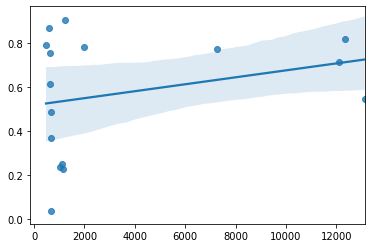

In [18]:
import seaborn as sns
sns.regplot(list(size2num.keys()), list(size2num.values()))

In [8]:
size2num = {name2stats[i]: j[0] for i,j in df_admet.iloc[0].Result.items() if i not in ['caco2_wang', 'lipophilicity_astrazeneca', 'solubility_aqsoldb', 'ppbr_az', 'ld50_zhu']}


In [9]:
admet_metrics = {'caco2_wang': 'mae',
            'hia_hou': 'roc-auc',
            'pgp_broccatelli': 'roc-auc', 
            'bioavailability_ma': 'roc-auc',
            'lipophilicity_astrazeneca': 'mae',
            'solubility_aqsoldb': 'mae',
            'bbb_martins': 'roc-auc',
            'ppbr_az': 'mae',
            'vdss_lombardo': 'pcc',
            'cyp2c9_veith': 'pr-auc',
            'cyp2d6_veith': 'pr-auc',
            'cyp3a4_veith': 'pr-auc',
            'cyp2c9_substrate_carbonmangels': 'pr-auc',
            'cyp3a4_substrate_carbonmangels': 'roc-auc',
            'cyp2d6_substrate_carbonmangels': 'pr-auc',
            'half_life_obach': 'pcc',
            'clearance_hepatocyte_az': 'pcc',
            'clearance_microsome_az': 'pcc',
            'ld50_zhu': 'mae',
            'herg': 'roc-auc',
            'ames': 'roc-auc',
            'dili': 'roc-auc'
            }

In [10]:
ADMET = {
    'Absorption': ['caco2_wang', 'hia_hou', 'pgp_broccatelli', 'bioavailability_ma', 'lipophilicity_astrazeneca', 'solubility_aqsoldb'],
    'Distribution': ['bbb_martins', 'ppbr_az', 'vdss_lombardo'],
    'Metabolism': ['cyp2c9_veith', 'cyp2d6_veith', 'cyp3a4_veith', 'cyp2c9_substrate_carbonmangels', 'cyp2d6_substrate_carbonmangels', 'cyp3a4_substrate_carbonmangels'],
    'Excretion': ['half_life_obach', 'clearance_hepatocyte_az', 'clearance_microsome_az'],
    'Toxicity': ['ld50_zhu', 'herg', 'ames', 'dili']
}

In [18]:
df_admet = df_admet[df_admet.Name != 'Parker Burchett']

In [36]:
def get_entries(bm):
    results = df_admet.Result.apply(lambda x: x[bm][0]).values
    print(results)
    
    '''
    rank_dict = dict(zip(range(results.shape[0]), list([0] * results.shape[0])))
    
    for idx, i in enumerate(range(results.T.shape[0])):
        # for every benchmark
        sort_idx = np.argsort(results.T[i], axis = 0)
        if metrics_direction[admet_metrics[ADMET[category][idx]]] == 'desc':
            sort_idx = np.argsort(results.T[i], axis = 0)
        else:
            sort_idx = np.argsort(results.T[i], axis = 0)[::-1]
        
        for pos, val in enumerate(sort_idx):
            rank_dict[val] = rank_dict[val] + pos
    
    rank = [] # [rank for 1, rank for 2, ...]
    for i in range(results.shape[0]):
        rank.append(rank_dict[i])
        
    out = np.argsort(rank)
    
    idx2rank = dict(zip(out, list(range(len(out)))))
    rank2idx = dict(zip(list(range(len(out))), out))
    '''
    
    if metrics_direction[admet_metrics[bm]] == 'desc':
        out = np.argsort(results)
    else:
        out = np.argsort(results)[::-1]
        
    idx2rank = dict(zip(out, list(range(len(out)))))
    rank2idx = dict(zip(list(range(len(out))), out))
    
    print('---- ' + bm + ' ------')
    print('---- ' + admet_metrics[bm] + ' ------')
    entries = []
    for submit_idx in range(len(df_admet)):
        temp = df_admet.iloc[submit_idx]
        html_code = '<tr> \n'
        html_code = html_code + '  <td> ' + str(idx2rank[submit_idx] + 1) + ' </td> \n'        
        html_code = html_code + '  <td> ' + temp.Model + ' </td> \n'
        html_code = html_code + '  <td><a href="mailto:' + temp.Email + '">' + temp.Name + '</a></td> \n'
        html_code = html_code + '  <td><a href="' + temp.Code_URL + '"> GitHub</a>, <a href="' + temp.Paper_URL + '">Paper </a></td> \n'
        value = int(temp['#Params'])
        html_code = html_code + '  <td> ' + f'{value:,}' + ' </td> \n'
        html_code = html_code + '  <td>' + format(temp.Result[bm][0], '.3f') + ' <span>&#177;</span> ' + format(temp.Result[bm][1], '.3f') +' </td> \n'
        html_code += '</tr>'

        entries.append(html_code)
    
    for i in range(len(out)):
        print(entries[rank2idx[i]])

In [37]:
for i, j in ADMET.items():
    for x in j:
        get_entries(x)

[0.446 0.393 0.908 0.53  0.401 0.502 0.546 0.599]
---- caco2_wang ------
---- mae ------
<tr> 
  <td> 1 </td> 
  <td> RDKit2D + MLP (DeepPurpose) </td> 
  <td><a href="mailto:kexinhuang@hsph.harvard.edu">Kexin Huang</a></td> 
  <td><a href="https://github.com/mims-harvard/TDC/tree/master/examples/single_pred/admet"> GitHub</a>, <a href="https://doi.org/10.1093/bioinformatics/btaa1005">Paper </a></td> 
  <td> 633,409 </td> 
  <td>0.393 <span>&#177;</span> 0.024 </td> 
</tr>
<tr> 
  <td> 2 </td> 
  <td> AttentiveFP </td> 
  <td><a href="mailto:kexinh@stanford.edu">Kexin Huang</a></td> 
  <td><a href="https://github.com/mims-harvard/TDC/tree/main/examples/single_pred/admet"> GitHub</a>, <a href="https://pubmed.ncbi.nlm.nih.gov/31408336/">Paper </a></td> 
  <td> 300,806 </td> 
  <td>0.401 <span>&#177;</span> 0.032 </td> 
</tr>
<tr> 
  <td> 3 </td> 
  <td> CNN (DeepPurpose) </td> 
  <td><a href="mailto:kexinhuang@hsph.harvard.edu">Kexin Huang</a></td> 
  <td><a href="https://github.com/mims

In [22]:
df_admet

,Time,Name,Email,Model,Paper_URL,Code_URL,Hardware,#Params,Group,Text_Result,PKL_Result,Result
0,2020/12/23 2:46:51 PM PST,Kexin Huang,kexinhuang@hsph.harvard.edu,CNN (DeepPurpose),https://doi.org/10.1093/bioinformatics/btaa1005,https://github.com/mims-harvard/TDC/tree/maste...,NVIDIA Tesla K80 GPU,226625,ADMET Group,"{'caco2_wang': [0.446, 0.036],\n 'hia_hou': [0...",NaN,"{'caco2_wang': [0.446, 0.036], 'hia_hou': [0.8..."
1,2020/12/23 2:47:41 PM PST,Kexin Huang,kexinhuang@hsph.harvard.edu,RDKit2D + MLP (DeepPurpose),https://doi.org/10.1093/bioinformatics/btaa1005,https://github.com/mims-harvard/TDC/tree/maste...,NVIDIA Tesla K80 GPU,633409,ADMET Group,"{'caco2_wang': [0.393, 0.024],\n 'hia_hou': [0...",NaN,"{'caco2_wang': [0.393, 0.024], 'hia_hou': [0.9..."
2,2020/12/23 2:48:30 PM PST,Kexin Huang,kexinhuang@hsph.harvard.edu,Morgan + MLP (DeepPurpose),https://doi.org/10.1093/bioinformatics/btaa1005,https://github.com/mims-harvard/TDC/tree/maste...,NVIDIA Tesla K80 GPU,1477185,ADMET Group,"{'caco2_wang': [0.908, 0.06],\n 'hia_hou': [0....",NaN,"{'caco2_wang': [0.908, 0.06], 'hia_hou': [0.80..."
11,2022/01/10 7:07:47 PM PST,Kexin Huang,kexinh@stanford.edu,NeuralFP,https://ieeexplore.ieee.org/document/9412489,https://github.com/mims-harvard/TDC/tree/main/...,NVIDIA GPU,480193,ADMET Group,"{'caco2_wang': [0.530, 0.102],\n'hia_hou': [0....",NaN,"{'caco2_wang': [0.53, 0.102], 'hia_hou': [0.94..."
12,2022/01/10 7:17:01 PM PST,Kexin Huang,kexinh@stanford.edu,AttentiveFP,https://pubmed.ncbi.nlm.nih.gov/31408336/,https://github.com/mims-harvard/TDC/tree/main/...,NVIDIA,300806,ADMET Group,"{'caco2_wang': [0.401, 0.032],\n'hia_hou': [0....",NaN,"{'caco2_wang': [0.401, 0.032], 'hia_hou': [0.9..."
13,2022/01/10 7:22:16 PM PST,Kexin Huang,kexinh@stanford.edu,ContextPred,https://arxiv.org/abs/1905.12265,https://github.com/mims-harvard/TDC/tree/main/...,Titan,2067053,ADMET Group,"{'caco2_wang': [0.502, 0.036],\n'hia_hou': [0....",NaN,"{'caco2_wang': [0.502, 0.036], 'hia_hou': [0.9..."
14,2022/01/10 7:23:20 PM PST,Kexin Huang,kexinh@stanford.edu,AttrMasking,https://arxiv.org/abs/1905.12265,https://github.com/mims-harvard/TDC/tree/main/...,Titan,2067053,ADMET Group,"{'caco2_wang': [0.546, 0.052],\n'hia_hou': [0....",NaN,"{'caco2_wang': [0.546, 0.052], 'hia_hou': [0.9..."
15,2022/01/10 7:24:57 PM PST,Kexin Huang,kexinh@stanford.edu,GCN,https://arxiv.org/abs/1609.02907,https://github.com/mims-harvard/TDC/tree/main/...,NVIDIA,191810,ADMET Group,"{'caco2_wang': [0.599, 0.104],\n'hia_hou': [0....",NaN,"{'caco2_wang': [0.599, 0.104], 'hia_hou': [0.9..."


## Docking Group

In [32]:
df_docking = df[df.Group == 'Docking Group']

In [33]:
df_docking

,Time,Name,Email,Model,Paper_URL,Code_URL,Hardware,#Params,Group,Text_Result,PKL_Result,Result
4,2021/05/19 3:57:00 PM MDT,Tianfan Fu,tfu42@gatech.edu,GCPN,https://arxiv.org/abs/1806.02473,https://github.com/futianfan/GCPN,Titan GPU,"17,600",Docking Group,NaN,https://drive.google.com/u/0/open?usp=forms_we...,NaN
5,2021/05/19 3:58:05 PM MDT,Tianfan Fu,tfu42@gatech.edu,SMILES-LSTM,https://pubs.acs.org/doi/10.1021/acscentsci.7b...,https://github.com/futianfan/guacamol_tdc,GPU Titan,"3,149,000",Docking Group,NaN,https://drive.google.com/u/0/open?usp=forms_we...,NaN
6,2021/05/19 3:59:00 PM MDT,Tianfan Fu,tfu42@gatech.edu,Graph-GA,https://pubs.rsc.org/en/content/articlelanding...,https://github.com/futianfan/guacamol_tdc,CPU,0,Docking Group,NaN,https://drive.google.com/u/0/open?usp=forms_we...,NaN
7,2021/06/01 8:39:47 PM MDT,Tianfan Fu,tfu42@gatech.edu,MolDQN,https://www.nature.com/articles/s41598-019-471...,https://github.com/futianfan/mol_dqn_docking,GPUs,2694800,Docking Group,NaN,https://drive.google.com/u/0/open?usp=forms_we...,NaN
8,2021/06/01 8:41:21 PM MDT,Tianfan Fu,tfu42@gatech.edu,MARS,https://openreview.net/pdf?id=kHSu4ebxFXY,https://github.com/futianfan/MARS,GPUs,153000,Docking Group,NaN,https://drive.google.com/u/0/open?usp=forms_we...,NaN
9,2021/06/02 6:30:01 PM MDT,Tianfan Fu,tfu42@gatech.edu,Random,NaN,NaN,CPU,0,Docking Group,NaN,https://drive.google.com/u/0/open?usp=forms_we...,NaN


In [7]:
from Google import Create_Service

CLIENT_SECRET_FILE = 'client_secret_file.json'
API_NAME = 'drive'
API_VERSION = 'v3'
SCOPES = ['https://www.googleapis.com/auth/drive']

service = Create_Service(CLIENT_SECRET_FILE, API_NAME, API_VERSION, SCOPES)

client_secret_file.json-drive-v3-(['https://www.googleapis.com/auth/drive'],)
['https://www.googleapis.com/auth/drive']


RefreshError: ('invalid_grant: Token has been expired or revoked.', '{\n  "error": "invalid_grant",\n  "error_description": "Token has been expired or revoked."\n}')

In [8]:
import os, io
from googleapiclient.http import MediaIoBaseDownload

file_ids = [i.split('id=')[1] for i in df_docking.PKL_Result.values]
file_names = [i + '.pkl' for i in df_docking.Model.values]

for file_id, file_name in zip(file_ids, file_names):
    request = service.files().get_media(fileId = file_id)
    fh = io.BytesIO()
    downloader = MediaIoBaseDownload(fd = fh, request = request)
    
    done = False
    while not done:
        status, done = downloader.next_chunk()
        print('Download progress {0}'.format(status.progress() * 100))

    fh.seek(0)

    with open(os.path.join('./docking_result', file_name), 'wb') as f:
        f.write(fh.read())
        f.close()

Download progress 100.0
Download progress 100.0
Download progress 100.0


In [34]:
import pickle
import os, io

def get_result(x):
    with open(os.path.join('./docking_result', x + '.pkl'), 'rb') as f:      
        x = pickle.load(f)
    return x
              
df_docking['Result'] = df_docking.Model.apply(lambda x: get_result(x))

/Users/kexinhuang/opt/anaconda3/envs/DeepPurpose/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':


In [60]:
metrics = ['top100', 'top10', 'top1', 'diversity', 'novelty', '%pass', 'top1_%pass', 'm1']
vs = ['-12.080', '-12.590', '-12.800', '0.864', '-', '0.780', '-11.700', '5.100']
metric2vs = dict(zip(metrics, vs))

In [51]:
metric2metric_latex = {'top100': 'Top100 ($\\downarrow$)',
                      'top10': 'Top10 ($\\downarrow$)',
                      'top1': 'Top1 ($\\downarrow$)',
                      'diversity': 'Diversity ($\\uparrow$)',
                      'novelty': 'Novelty ($\\uparrow$)',
                      '%pass': '\%Pass ($\\uparrow$)',
                      'top1_%pass': 'Top1 \\%Pass ($\\downarrow$)',
                      'm1': 'm1 ($\\downarrow$)'}

In [63]:
print("{:s} & \\multirow{{8}}{{*}}{{{:s}}} & {:s}".format(metric2metric_latex[x], str(call), metric2vs[x]))

m1 ($\downarrow$) & \multirow{8}{*}{5000} & 5.100


In [78]:
metric_arrow = {'top100': 'down', 'top10': 'down', 'top1':'down', 'diversity': 'up', 'novelty':'up', '%pass':'up', 'top1_%pass':'down', 'm1': 'down'}

In [85]:
np.where(np.argsort(all_mean) == 0)[0][0]

0

In [86]:
np.where(np.argsort(all_mean)[::-1] == 0)[0][0]

5

In [94]:
np.argsort(np.array(all_mean))

array([0, 2, 5, 1, 3, 4])

In [93]:
all_mean

[5.61, 9.669, 5.826, 10.0, 10.0, 7.073]

In [88]:
all_mean

[5.61, 9.669, 5.826, 10.0, 10.0, 7.073]

In [99]:
np.array(all_mean)[np.argsort(all_mean)]

array([ 5.61 ,  5.826,  7.073,  9.669, 10.   , 10.   ])

In [110]:
out = {df_docking.Model.iloc[ind]: df_docking.Result.iloc[ind]['DRD3'] for ind in range(len(df_docking))}
method_order = ['Random', 'Graph-GA', 'SMILES-LSTM', 'GCPN', 'MolDQN', 'MARS']

for call in [100, 500, 1000, 5000]:    
    for x in metrics:
        
        if x == 'top100':
            table = "{:s} & {:s} & \\multirow{{8}}{{*}}{{{:s}}}".format(metric2metric_latex[x], metric2vs[x], str(call))
        else:
            table = "{:s} & {:s} & ".format(metric2metric_latex[x], metric2vs[x])
            
        all_mean = [out[method][call][x][0] for method in method_order]
        
        if metric_arrow[x] == 'down':
            idx_1st = np.argsort(np.array(all_mean))[0]
            idx_2nd = np.argsort(np.array(all_mean))[1]
        else:
            idx_1st = np.argsort(-1 * np.array(all_mean))[0]
            idx_2nd = np.argsort(-1 * np.array(all_mean))[1]
        if x == 'novelty':
            for i, method in enumerate(method_order):
                if method == 'Random':
                    table += '& -'
                else:
                    table += '& {:.3f}\std{{{:.3f}}}'.format(out[method][call][x][0], out[method][call][x][1])
        else:
        
            for i, method in enumerate(method_order):
                
                if i == idx_1st:
                    table += '& \\bf {:.3f}\std{{{:.3f}}}'.format(out[method][call][x][0], out[method][call][x][1])
                elif i == idx_2nd:
                    table += '& \\underline{{{:.3f}\std{{{:.3f}}}}}'.format(out[method][call][x][0], out[method][call][x][1])
                else:
                    table += '& {:.3f}\std{{{:.3f}}}'.format(out[method][call][x][0], out[method][call][x][1])
        table = table + '\\\\'
        print(table)
    if call != 5000:
        print('\\midrule')
    else:
        print('')

Top100 ($\downarrow$) & -12.080 & \multirow{8}{*}{100}& \underline{-7.554\std{0.065}}& -7.222\std{0.013}& \bf -7.594\std{0.182}& 3.860\std{0.102}& -5.178\std{0.341}& -5.928\std{0.298}\\
Top10 ($\downarrow$) & -12.590 & & -9.727\std{0.276}& \bf -10.177\std{0.158}& \underline{-10.033\std{0.186}}& -5.617\std{0.413}& -6.438\std{0.176}& -8.133\std{0.328}\\
Top1 ($\downarrow$) & -12.800 & & -10.367\std{0.464}& \bf -11.767\std{1.087}& -11.133\std{0.634}& \underline{-11.633\std{2.217}}& -7.020\std{0.194}& -9.100\std{0.712}\\
Diversity ($\uparrow$) & 0.864 & & 0.881\std{0.002}& 0.885\std{0.001}& 0.884\std{0.002}& \bf 0.909\std{0.001}& \underline{0.907\std{0.001}}& 0.873\std{0.010}\\
Novelty ($\uparrow$) & - & & -& 1.000\std{0.000}& 1.000\std{0.000}& 1.000\std{0.000}& 1.000\std{0.000}& 1.000\std{0.000}\\
\%Pass ($\uparrow$) & 0.780 & & 0.717\std{0.005}& 0.693\std{0.037}& \underline{0.763\std{0.019}}& 0.093\std{0.009}& 0.017\std{0.012}& \bf 0.807\std{0.033}\\
Top1 \%Pass ($\downarrow$) & -11.700 

In [18]:
## generate molecule images
from rdkit import Chem
from rdkit.Chem import Draw

for submit_idx in range(len(df_docking)):
    temp = df_docking.iloc[submit_idx]

    for target in temp.Result.keys():
        for max_calls in temp.Result[target].keys():
            mols = [Chem.MolFromSmiles(i) for i in temp.Result[target][max_calls]['top smiles']]
            img = Draw.MolsToGridImage(mols, molsPerRow=6, subImgSize=(200, 200), maxMols=300)
            file_path = 'benchmark/docking_group/smiles/' + target.lower() + '/img/' + temp.Model + '_' + str(max_calls) + '.png'
            img.save(file_path)

In [11]:
## best in data
pred = dict(pd.read_csv('../tdc_leaderboard/docking_zinc_drd3_top100', sep = '\t', header = None).values)

mols = [Chem.MolFromSmiles(i) for i in list(pred.keys())]
img = Draw.MolsToGridImage(mols, molsPerRow=6, subImgSize=(200, 200), maxMols=300)
file_path = 'benchmark/docking_group/smiles/' + target.lower() + '/img/best_in_data.png'
img.save(file_path)

In [19]:
## generate html page for that image
html_code = ''
all_targets = list(temp.Result.keys())

for target in all_targets:    
    for submit_idx in range(len(df_docking)):
        temp = df_docking.iloc[submit_idx]
        html_code += '# Generated Molecules for '+ target + ' Docking Leaderboard - ' + temp.Model + ' \n'
        for max_calls in temp.Result[target].keys():
            html_code += '### ' + temp.Model + ' ' + str(max_calls) + ' Maximum Calls Top Generated Molecules\n'
            html_code += "\n"
            html_code += "<b> <i class='fas fa-long-arrow-alt-left'></i> <a href='/benchmark/docking_group/"+ target.lower() + "'> Go Back To Leaderboard</a> </b>"
            html_code += "\n"
            html_code += "<img src='/benchmark/docking_group/smiles/" + target.lower() + "/img/" + temp.Model + "_" + str(max_calls) + ".png'> \n"
            html_code += "\n"
            html_code += "\n"

In [20]:
print(html_code)

# Generated Molecules for DRD3 Docking Leaderboard - GCPN 
### GCPN 100 Maximum Calls Top Generated Molecules

<b> <i class='fas fa-long-arrow-alt-left'></i> <a href='/benchmark/docking_group/drd3'> Go Back To Leaderboard</a> </b>
<img src='/benchmark/docking_group/smiles/drd3/img/GCPN_100.png'> 


### GCPN 500 Maximum Calls Top Generated Molecules

<b> <i class='fas fa-long-arrow-alt-left'></i> <a href='/benchmark/docking_group/drd3'> Go Back To Leaderboard</a> </b>
<img src='/benchmark/docking_group/smiles/drd3/img/GCPN_500.png'> 


### GCPN 1000 Maximum Calls Top Generated Molecules

<b> <i class='fas fa-long-arrow-alt-left'></i> <a href='/benchmark/docking_group/drd3'> Go Back To Leaderboard</a> </b>
<img src='/benchmark/docking_group/smiles/drd3/img/GCPN_1000.png'> 


### GCPN 5000 Maximum Calls Top Generated Molecules

<b> <i class='fas fa-long-arrow-alt-left'></i> <a href='/benchmark/docking_group/drd3'> Go Back To Leaderboard</a> </b>
<img src='/benchmark/docking_group/smiles/d

In [21]:
def get_entries(bm, max_calls):
    results = df_docking.Result.apply(lambda x: x[bm][max_calls]['top100'][0]).values
    
    out = np.argsort(results)
    idx2rank = dict(zip(out, list(range(len(out)))))
    rank2idx = dict(zip(list(range(len(out))), out))
    
    print('---- ' + bm + ' ------')
    entries = []
    for submit_idx in range(len(df_docking)):
        temp = df_docking.iloc[submit_idx]
        html_code = '<tr> \n'
        html_code = html_code + '  <td> ' + str(idx2rank[submit_idx] + 1) + ' </td> \n'        
        html_code = html_code + '  <td> ' + temp.Model + ' </td> \n'
        html_code = html_code + '  <td><a href="mailto:' + temp.Email + '">' + temp.Name + '</a></td> \n'
        html_code = html_code + '  <td><a href="' + temp.Code_URL + '"> GitHub</a>, <a href="' + temp.Paper_URL + '">Paper </a></td> \n'
        value = temp['#Params']
        value = int(str(value).replace(',', ''))
        html_code = html_code + '  <td> ' + f'{value:,}' + ' </td> \n'
        for metric in ['top100', 'top10', 'top1', 'diversity', 'novelty', '%pass', 'top1_%pass', 'm1']:
            html_code = html_code + '  <td>' + format(temp.Result[bm][max_calls][metric][0], '.3f') + ' <span>&#177;</span> ' + format(temp.Result[bm][max_calls][metric][1], '.3f') +' </td> \n'
        
        html_code += "  <td> <a href='/benchmark/docking_group/smiles/" + bm.lower() + "/" + temp.Model.lower() + "_smiles/#" + temp.Model.lower() + "-" + str(max_calls) +"-maximum-calls-top-generated-molecules'> Link </a> </td> \n"
        html_code += '</tr>'

        entries.append(html_code)
    
    for i in range(len(out)):
        print(entries[rank2idx[i]])

In [26]:
get_entries('DRD3', 100)

---- DRD3 ------
<tr> 
  <td> 1 </td> 
  <td> SMILES-LSTM </td> 
  <td><a href="mailto:tfu42@gatech.edu">Tianfan Fu</a></td> 
  <td><a href="https://github.com/futianfan/guacamol_tdc"> GitHub</a>, <a href="https://pubs.acs.org/doi/10.1021/acscentsci.7b00512">Paper </a></td> 
  <td> 3,149,000 </td> 
  <td>-7.594 <span>&#177;</span> 0.182 </td> 
  <td>-10.033 <span>&#177;</span> 0.186 </td> 
  <td>-11.133 <span>&#177;</span> 0.634 </td> 
  <td>0.884 <span>&#177;</span> 0.002 </td> 
  <td>1.000 <span>&#177;</span> 0.000 </td> 
  <td>0.763 <span>&#177;</span> 0.019 </td> 
  <td>-1.100 <span>&#177;</span> 1.417 </td> 
  <td>5.219 <span>&#177;</span> 0.247 </td> 
  <td> <a href='/benchmark/docking_group/smiles/drd3/smiles-lstm_smiles/#smiles-lstm-100-maximum-calls-top-generated-molecules'> Link </a> </td> 
</tr>
<tr> 
  <td> 2 </td> 
  <td> Graph-GA </td> 
  <td><a href="mailto:tfu42@gatech.edu">Tianfan Fu</a></td> 
  <td><a href="https://github.com/futianfan/guacamol_tdc"> GitHub</a>, <a hr